In [1]:
from time import time
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
sys.setrecursionlimit(100000)

In [2]:
def get_smallest(length):
    smallest = [0, 0]
    for l in range(len(smallest), length + 1):
        s = smallest[(l - 1) // 2] + smallest[l // 2] + l - 1
        smallest.append(s)
    return smallest

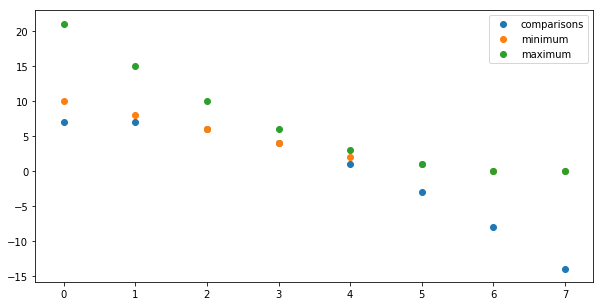

In [3]:
def plot_1(length, comparisons):
    smallest = get_smallest(length)
    X, C, S, B = [], [], [], []
    comparisons -= length - 1
    for less in range(length):
        max_less = less * (less - 1) // 2
        comparisons_more = comparisons - max_less

        X.append(less)
        C.append(comparisons_more)

        more = length - 1 - less
        S.append(smallest[more])
        B.append(more * (more - 1) // 2)
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.scatter(X, C, label='comparisons')
    ax.scatter(X, S, label='minimum')
    ax.scatter(X, B, label='maximum')
    ax.legend()
    plt.show()
    
plot_1(8, 14)

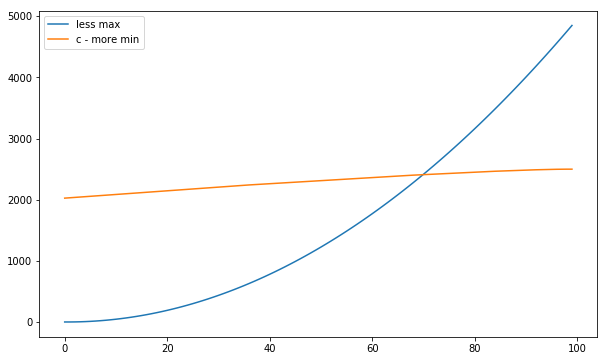

In [4]:
def plot_2(length, comparisons):
    smallest = get_smallest(length)
    L, U = [], []
    
    max_less_V, min_less_V = [], []
    max_more_V, min_more_V = [], []
    for less in range(length):
        more = length - 1 - less
        max_more, min_more = more * (more - 1) // 2, smallest[more]
        max_less, min_less = less * (less - 1) // 2, smallest[less]
        
        max_less_V.append(max_less)
        min_less_V.append(min_less)
        max_more_V.append(comparisons - max_more)
        min_more_V.append(comparisons - min_more)

        lower = max(min_less, comparisons - max_more)
        upper = min(max_less, comparisons - min_more)
        L.append(lower)
        U.append(upper)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    # ax.scatter(range(length), L, label='lower')
    # ax.scatter(range(length), U, label='upper')
    
    # ax.plot(min_less_V, label='less min')
    # ax.plot(max_more_V, label='c - more max')
    
    ax.plot(max_less_V, label='less max')
    ax.plot(min_more_V, label='c - more min')

    ax.legend()
    plt.show()
    
plot_2(100, 2500)

In [17]:
def lena_sort(arr):
    if len(arr) == 0:
        return [], 0
    if len(arr) == 1:
        return arr, 0

    pivot = arr[0]
    less, more = [], []
    for a in arr[1:]:
        if a < pivot:
            less.append(a)
        else:
            more.append(a)
    
    less_sorted, less_comparisons = lena_sort(less)
    more_sorted, more_comparisons = lena_sort(more)
    arr_sorted = less_sorted + [pivot] + more_sorted
    comparisons = less_comparisons + more_comparisons + len(arr) - 1

    return arr_sorted, comparisons

In [32]:
def get_min_arr(length, start):
    """
    get the array with integer 0, ..., n-1 such that
    it requires the minimum number of comparison
    when applying QuickSort.
    """
    if length == 0:
        return []
    if length == 1:
        return [0]
    
    memo = [(0, length)]
    while len(memo) < length:
        new_memo = []
        for m in memo:
            if isinstance(m, int):
                new_memo.append(m)
            else:
                s, l = m
                middle = s + (l - 1) // 2
                new_memo.append(middle)
                s_less, l_less = s, (l - 1) // 2
                s_more, l_more = middle + 1, l // 2
                if l_less == 1:
                    new_memo.append(s_less)
                elif l_less > 1:
                    new_memo.append((s_less, l_less))
                if l_more == 1:
                    new_memo.append(s_more)
                elif l_more > 1:
                    new_memo.append((s_more, l_more))
        memo = new_memo
    
    return [start + m for m in memo]


def rec(length, comparisons, first):

    if length == 0:
        return []
    if length == 1:
        return [first]
    
    # length of increasing sequence it could tolerate
    prefix_length = 0
    remaining = length
    while True:
        tmp = remaining - 1
        if comparisons - tmp >= smallest[tmp]:
            prefix_length += 1
            comparisons -= tmp
            remaining = tmp
        else:
            break
    prefix = [first + p for p in range(prefix_length)]
#    print(f'prefix length = {prefix_length}')
    
    # split
    length -= prefix_length
    comparisons -= remaining - 1
    first = first + prefix_length
    
    for less in range((length + 1) // 2):
        more = length - 1 - less
        max_more, min_more = more * (more - 1) // 2, smallest[more]
        max_less, min_less = less * (less - 1) // 2, smallest[less]
        lower = max(min_less, comparisons - max_more)
        upper = min(max_less, comparisons - min_more)
        if upper >= lower:
            break
#     print(f'\nlength={length}, comparison={comparisons}, less={less}')
#     print(f'\tless = {less}, more = {more}')
#     print(f'\tless half: ({min_less}, {max_less})')
#     print(f'\tmore half: ({min_more}, {max_more})')
#     print(f'\t(lower, upper) = ({lower}, {upper})')  
    pivot = first + less

    if lower == comparisons - max_more:     # comparisons_more = max_more
        # print('lower == comparisons - max_more')
        comparisons_less = lower        
        A = rec(less, comparisons_less, first)
        B = list(range(pivot + 1, pivot + 1 + more))
    elif upper == comparisons - min_more:   # comparisons_more = min_more
        # print('upper == comparisons - min_more')
        comparisons_less = upper        
        A = rec(less, comparisons_less, first)
        B = get_min_arr(more, pivot + 1)
    else: # upper == max_less
        # print('upper == max_less')
        comparisons_less = upper
        comparisons_more = comparisons - comparisons_less
        A = list(range(first, first + less))
        B = rec(more, comparisons_more, pivot + 1)

    return prefix + [pivot] + A + B

length, comparisons = 10, 33
length, comparisons = 100000, 323932335
# length, comparisons = 6375, 14536397
# length, comparisons = 6375, 20166666
smallest = get_smallest(length)
# for i, s in enumerate(smallest):
#     print(f'{i}: {s}')

time0 = time()
arr = rec(length, comparisons, 1)
# print(arr)
print('done')
time1 = time()
print(f'{time1 - time0:.3f}')
print(len(set(arr)) == length)
arr_sorted, comparisons = lena_sort(arr)

print(arr)
print(arr_sorted == list(range(1, length + 1)), comparisons)

upper == comparisons - min_more
upper == comparisons - min_more
upper == comparisons - min_more
upper == comparisons - min_more
upper == comparisons - min_more
upper == comparisons - min_more
upper == comparisons - min_more
upper == comparisons - min_more
lower == comparisons - max_more
done
0.364
True
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161

In [31]:
df = pd.read_csv('data/input03.txt', sep='\s+')
num_queries = df.columns[0]
df = df.reset_index().rename(columns={'index': 'length', num_queries: 'comparisons'})
queries = df.values
type(queries[0][0])

numpy.int64

In [35]:
smallest = get_smallest(queries[:, 0].max())
# print(smallest)
time0 = time()
for length, comparisons in queries:
    print(isinstance(length, np.int64), isinstance(comparisons, int))
    arr = find_arr(length, comparisons)
    _, c = lena_sort(arr)
    print(f'{comparisons}, {c}')

True False


TypeError: cannot unpack non-iterable numpy.int64 object

In [36]:
! cat data/input11.txt

8
100000 675013257
100000 475595761
100000 0
100000 323932335
100000 1468946
100000 1000000000
100000 468586326
100000 986975
